In [1]:
from dask.distributed import Client, progress
client = Client()
client

Client Scheduler: tcp://dask-scheduler:8786 Dashboard: http://dask-scheduler:8787/status,Cluster Workers: 2 Cores: 16 Memory: 2.15 GB


In [2]:
import dask.dataframe as dd
df = dd.demo.make_timeseries('2000-01-01', '2000-12-31', freq='30s', partition_freq='1M',
                             dtypes={'name': str, 'id': int, 'x': float, 'y': float})

In [3]:
df

,id,name,x,y
npartitions=11,,,,
2000-01-31,int64,object,float64,float64
2000-02-29,...,...,...,...
...,...,...,...,...
2000-11-30,...,...,...,...
2000-12-31,...,...,...,...


In [4]:
df.dtypes

id        int64
name     object
x       float64
y       float64
dtype: object

In [5]:
df.head(3)

,id,name,x,y
2000-01-31 00:00:00,987,Ursula,0.350396,0.791594
2000-01-31 00:00:30,994,Laura,0.789262,-0.720507
2000-01-31 00:01:00,1067,Jerry,-0.331080,-0.943229


In [6]:
df2 = df[df.y > 0]
df3 = df2.groupby('name').x.std()
df3

Dask Series Structure:
npartitions=1
    float64
        ...
Name: x, dtype: float64
Dask Name: sqrt, 60 tasks

In [7]:
computed_df = df3.compute()
type(computed_df)

pandas.core.series.Series

In [8]:
computed_df

name
Alice       0.575990
Bob         0.575971
Charlie     0.577260
Dan         0.575455
Edith       0.579273
Frank       0.577351
George      0.577698
Hannah      0.575425
Ingrid      0.578113
Jerry       0.577355
Kevin       0.580010
Laura       0.576162
Michael     0.579314
Norbert     0.581206
Oliver      0.575842
Patricia    0.575858
Quinn       0.576264
Ray         0.576687
Sarah       0.574823
Tim         0.576631
Ursula      0.575546
Victor      0.574191
Wendy       0.580018
Xavier      0.579114
Yvonne      0.576337
Zelda       0.574778
Name: x, dtype: float64

In [9]:
df = df.persist()

In [10]:
%matplotlib inline

In [11]:
df[['x', 'y']].resample('1w').mean().head()

,x,y
2000-02-06,0.005162,0.001593
2000-02-13,-0.000375,-0.006099
2000-02-20,0.004400,-0.002686
2000-02-27,0.004008,-0.008252


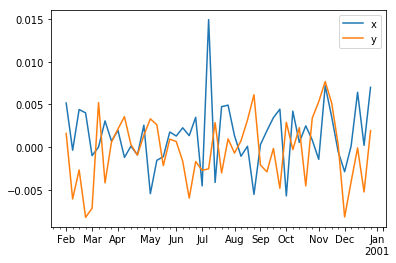

In [12]:
df[['x', 'y']].resample('1w').mean().compute().plot()

In [13]:
df[['x', 'y']].rolling(window='7d').mean().head()

,x,y
2000-01-31 00:00:00,0.350396,0.791594
2000-01-31 00:00:30,0.569829,0.035543
2000-01-31 00:01:00,0.269526,-0.290714
2000-01-31 00:01:30,0.433899,-0.460103
2000-01-31 00:02:00,0.343457,-0.481419


In [14]:
df.loc['2000-05-05']

,id,name,x,y
npartitions=1,,,,
2000-05-05,int64,object,float64,float64
2000-05-05,...,...,...,...


In [15]:
%time df.loc['2000-05-05'].compute()

CPU times: user 11.3 ms, sys: 3.4 ms, total: 14.7 ms
Wall time: 20.5 ms


,id,name,x,y
2000-05-05 00:00:00,978,Quinn,0.347786,-0.408146
2000-05-05 00:00:30,980,Ray,-0.733620,0.841894
2000-05-05 00:01:00,980,Dan,0.116067,-0.869704
2000-05-05 00:01:30,983,Sarah,0.713541,-0.700338
2000-05-05 00:02:00,960,Frank,0.296129,-0.355559
2000-05-05 00:02:30,1001,George,-0.194231,0.060761
2000-05-05 00:03:00,1097,Yvonne,0.410276,-0.239441
2000-05-05 00:03:30,985,Ursula,0.617555,0.178022
2000-05-05 00:04:00,954,Zelda,-0.860432,0.659859
2000-05-05 00:04:30,986,Ray,0.178634,0.408214


In [16]:
df = df.set_index('name')
df

,id,x,y
npartitions=11,,,
Alice,int64,float64,float64
Alice,...,...,...
...,...,...,...
Xavier,...,...,...
Zelda,...,...,...


In [17]:
df = df.persist()

In [18]:
%time df.loc['Alice'].compute()

CPU times: user 18.7 ms, sys: 10.7 ms, total: 29.4 ms
Wall time: 889 ms


,id,x,y
name,,,
Alice,976,0.325504,0.040799
Alice,987,0.901733,0.005105
Alice,1020,0.535033,0.825588
Alice,1027,-0.384632,0.632657
Alice,951,0.795427,0.110632
Alice,989,-0.184888,0.276064
Alice,1024,0.418009,-0.998683
Alice,1005,-0.127978,0.973820
Alice,1011,-0.254031,0.272650


In [19]:
from  sklearn.linear_model import LinearRegression

def train(partition):
    est = LinearRegression()
    est.fit(partition[['x']].values, partition.y.values)
    return est

In [20]:
df.groupby('name').apply(train, meta=object).compute()

name
Alice       LinearRegression(copy_X=True, fit_intercept=Tr...
Bob         LinearRegression(copy_X=True, fit_intercept=Tr...
Charlie     LinearRegression(copy_X=True, fit_intercept=Tr...
Dan         LinearRegression(copy_X=True, fit_intercept=Tr...
Edith       LinearRegression(copy_X=True, fit_intercept=Tr...
Frank       LinearRegression(copy_X=True, fit_intercept=Tr...
George      LinearRegression(copy_X=True, fit_intercept=Tr...
Hannah      LinearRegression(copy_X=True, fit_intercept=Tr...
Ingrid      LinearRegression(copy_X=True, fit_intercept=Tr...
Jerry       LinearRegression(copy_X=True, fit_intercept=Tr...
Kevin       LinearRegression(copy_X=True, fit_intercept=Tr...
Laura       LinearRegression(copy_X=True, fit_intercept=Tr...
Michael     LinearRegression(copy_X=True, fit_intercept=Tr...
Norbert     LinearRegression(copy_X=True, fit_intercept=Tr...
Oliver      LinearRegression(copy_X=True, fit_intercept=Tr...
Patricia    LinearRegression(copy_X=True, fit_intercept=Tr...
Qui